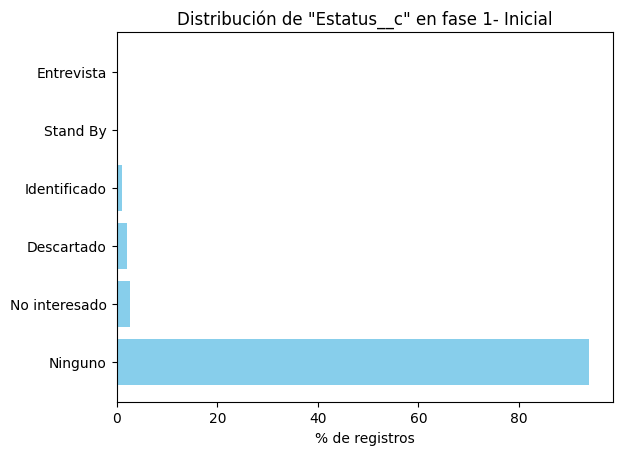

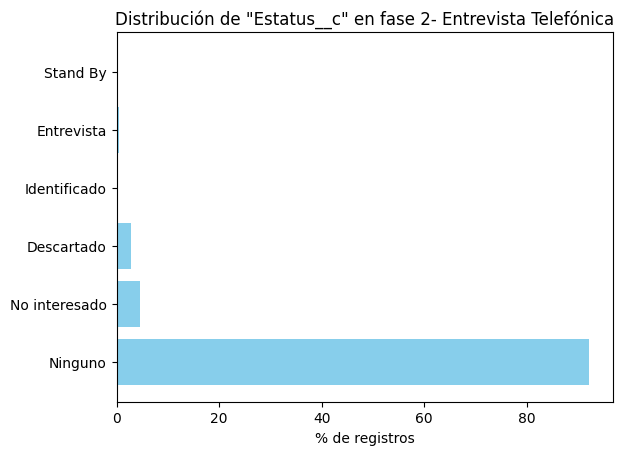

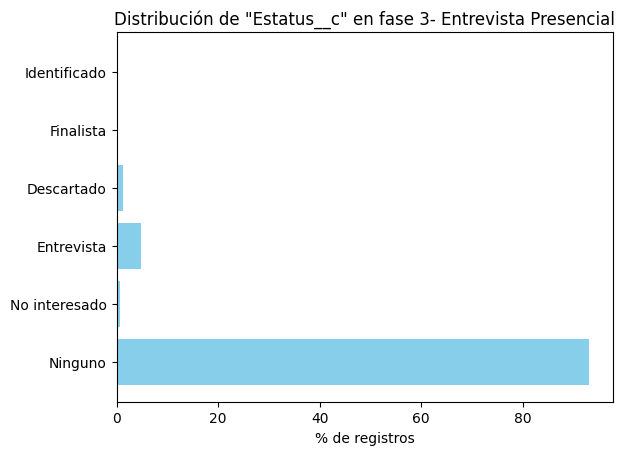

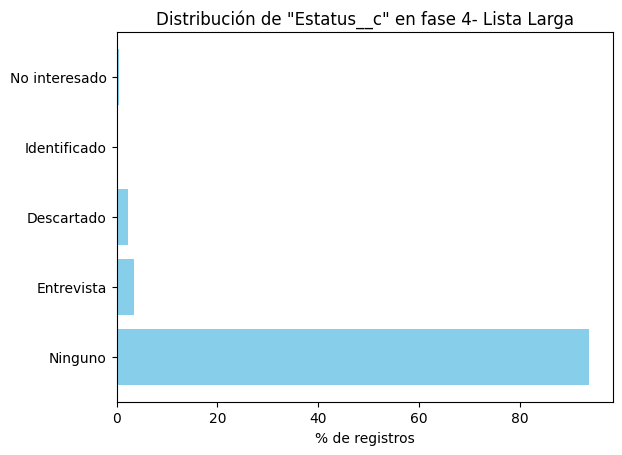

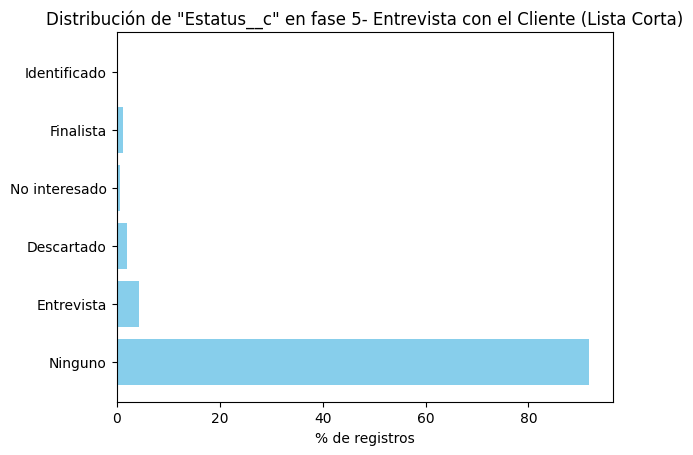

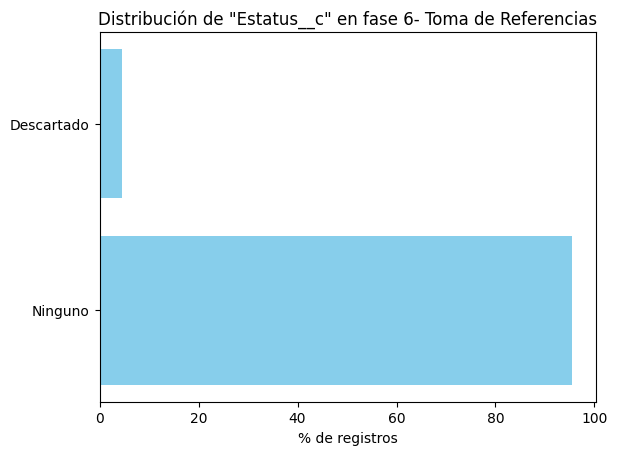

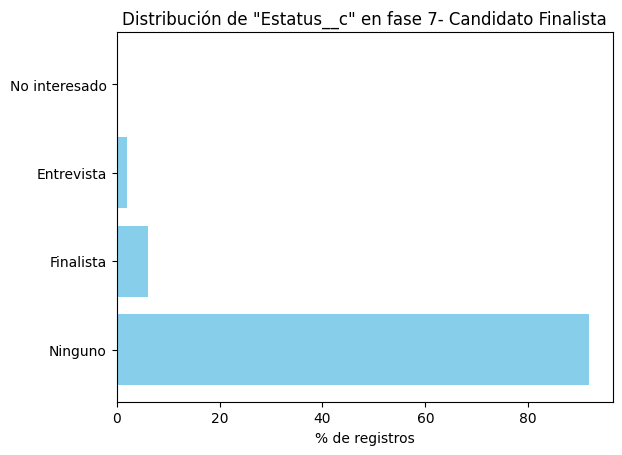

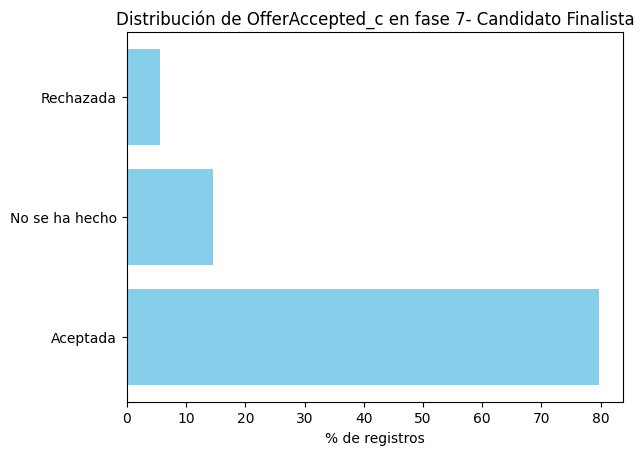

Percentage of Non-null Date Offered for Phase 7- Candidato Finalista: 34.74576271186441


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from config import get_sf_prod

def query_data():
    sf = get_sf_prod()
    query = """
    SELECT Phase__c, Estatus__c, OfferAccepted__c, DateOffered__c 
    FROM PDBContactJoin__c
    WHERE Phase__c != NULL
    """
    result = sf.query_all(query)
    records = result['records']
    return pd.DataFrame(records)

def plot_status_percentage(data, phase):
    phase_data = data[data['Phase__c'] == phase].fillna('Ninguno')
    status_counts = Counter(phase_data['Estatus__c'])
    total_records = len(phase_data)
    percentages = {k: (v / total_records) * 100 for k, v in status_counts.items()}
    
    plt.barh(list(percentages.keys()), list(percentages.values()), color='skyblue')
    plt.xlabel('% de registros')
    plt.title(f'Distribución de "Estatus__c" en fase {phase}')
    plt.show()

def plot_offer_percentage(data, phase):
    phase_data = data[data['Phase__c'] == phase].fillna('Ninguno')
    status_counts = Counter(phase_data['OfferAccepted__c'])
    total_records = len(phase_data)
    percentages = {k: (v / total_records) * 100 for k, v in status_counts.items()}
    
    plt.barh(list(percentages.keys()), list(percentages.values()), color='skyblue')
    plt.xlabel('% de registros')
    plt.title(f'Distribución de OfferAccepted_c en fase {phase}')
    plt.show()
    
    non_null_dates_count = (phase_data['DateOffered__c'] == 'Ninguno').sum()
    non_null_dates_percentage = (non_null_dates_count / total_records) * 100
    print(f"Percentage of Non-null Date Offered for Phase {phase}: {non_null_dates_percentage}")


def generate_plots():
    data = query_data()

    for phase in sorted(data['Phase__c'].unique()):
        plot_status_percentage(data, phase)
        if phase.startswith('7'):
            plot_offer_percentage(data, phase)

# Run the plotting functions
generate_plots()